In [1]:
import numpy as np
import pandas as pd
import sys
import json
import matplotlib.pyplot as plt

In [2]:
def get_gender_race_df(school):
    all_dict = []
    for department in school:
        department_name = department.get('department')
        if department.get('gender_race_data') is not None:
            for k,v in department.get('gender_race_data').items():
                dictionary = {'department': department_name}
                dictionary.update({'rank': k})
                gender_race_data = v
                # gender
                no_genders_name = gender_race_data.get('no_genders_name')
                for k, v in no_genders_name.items():
                    dictionary.update({'gender_name_'+k: v})
                no_genders_img = gender_race_data.get('no_genders_img')
                for k, v in no_genders_img.items():
                    dictionary.update({'gender_img_'+k: v})

                # race
                no_races_name = gender_race_data.get('no_races_name')
                for k, v in no_races_name.items():
                    dictionary.update({'race_name_'+k: v})
                no_races_img = gender_race_data.get('no_races_img')
                for k, v in no_races_img.items():
                    dictionary.update({'race_img_'+k: v})

                all_dict.append(dictionary)
    df = pd.DataFrame(all_dict)
    return df

In [3]:
def get_pct_df(df):
    pct_df = pd.DataFrame()
    if 'department' in df.columns:
        pct_df['department'] = df['department']
    pct_df['rank'] = df['rank']
    # pecentages excludes unknown
    pct_df['female_pct_name'] = df['gender_name_female']/(df['gender_name_female'] + df['gender_name_male'])
    pct_df['female_pct_img'] = df['gender_img_female']/(df['gender_img_female'] + df['gender_img_male'])
    pct_df['white_pct_name'] = df['race_name_white']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['white_pct_img'] = df['race_img_white']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['api_pct_name'] = df['race_name_api']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['api_pct_img'] = df['race_img_api']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['black_pct_name'] = df['race_name_black']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['black_pct_img'] = df['race_img_black']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['hispanic_pct_name'] = df['race_name_hispanic']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['hispanic_pct_img'] = df['race_img_hispanic']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['gender_unknown_pct_name'] = df['gender_name_unknown']/(df['gender_name_female']+ df['gender_name_male']+ df['gender_name_unknown'])
    pct_df['gender_unknown_pct_img'] = df['gender_img_unknown']/(df['gender_img_female']+ df['gender_img_male']+ df['gender_img_unknown'])
    pct_df['race_unknown_pct_name'] = df['race_name_unknown']/(df['race_name_unknown'] + df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['race_unknown_pct_img'] = df['race_img_unknown']/(df['race_img_unknown'] + df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    return pct_df

In [4]:
schools = ["columbia", "dartmouth", "yale", "princeton", "brown", "cornell", "upenn", "harvard"]

In [6]:
the_schools = {}
for school in schools:
    with open(sys.path[0] + f'/../data/{school}/{school}_v1_finalized.json', 'r') as f:
        the_school = json.load(f)
    the_schools.update({school: the_school})

In [15]:
school_dfs = {}
school_pct_dfs = {}
whole_school_pct_dfs = {}

for school in schools:
    the_school = the_schools.get(school)
    
    # departmental
    the_school_df = get_gender_race_df(the_school)
    school_dfs.update({school: the_school_df})
    
    # departmental pct
    the_school_pct_df = get_pct_df(the_school_df)
    the_school_pct_df.to_json(sys.path[0] + f'/../output/{school}_departmental_pct_initial.json', orient='records')
    school_pct_dfs.update({school: the_school_pct_df})
    
    # whole school pct
    the_whole_school_df = the_school_df.groupby('rank').sum(0).drop(columns='department').reset_index()
    the_whole_school_pct_df = get_pct_df(the_whole_school_df)
    the_whole_school_pct_df.to_json(sys.path[0] + f'/../output/{school}_whole_school_pct_initial.json', orient='records')
    whole_school_pct_dfs.update({school:the_whole_school_pct_df})

In [12]:
school_dfs.get('columbia').head()

,department,rank,gender_name_female,gender_name_male,gender_name_unknown,gender_img_female,gender_img_male,gender_img_unknown,race_name_white,race_name_black,race_name_api,race_name_hispanic,race_name_unknown,race_img_white,race_img_black,race_img_api,race_img_hispanic,race_img_unknown
0,Accounting Division,all,5,15,5,4,15,6,17,0,8,0,0,14,0,5,0,6
1,Accounting Division,professor,0,8,1,0,9,0,8,0,1,0,0,9,0,0,0,0
2,Accounting Division,associate professor,1,2,0,0,1,2,2,0,1,0,0,0,0,1,0,2
3,Accounting Division,assistant professor,2,5,3,3,5,2,6,0,4,0,0,4,0,4,0,2
4,Accounting Division,teaching staff,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
school_pct_dfs.get('columbia').head()

,department,rank,female_pct_name,female_pct_img,white_pct_name,white_pct_img,api_pct_name,api_pct_img,black_pct_name,black_pct_img,hispanic_pct_name,hispanic_pct_img,gender_unknown_pct_name,gender_unknown_pct_img,race_unknown_pct_name,race_unknown_pct_img
0,Accounting Division,all,0.250000,0.210526,0.680000,0.736842,0.320000,0.263158,0.0,0.0,0.0,0.0,0.200000,0.240000,0.0,0.240000
1,Accounting Division,professor,0.000000,0.000000,0.888889,1.000000,0.111111,0.000000,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.000000
2,Accounting Division,associate professor,0.333333,0.000000,0.666667,0.000000,0.333333,1.000000,0.0,0.0,0.0,0.0,0.000000,0.666667,0.0,0.666667
3,Accounting Division,assistant professor,0.285714,0.375000,0.600000,0.500000,0.400000,0.500000,0.0,0.0,0.0,0.0,0.300000,0.200000,0.0,0.200000
4,Accounting Division,teaching staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
whole_school_pct_dfs.get('columbia').head()

,rank,female_pct_name,female_pct_img,white_pct_name,white_pct_img,api_pct_name,api_pct_img,black_pct_name,black_pct_img,hispanic_pct_name,hispanic_pct_img,gender_unknown_pct_name,gender_unknown_pct_img,race_unknown_pct_name,race_unknown_pct_img
0,all,0.403736,0.261777,0.816106,0.694693,0.137420,0.160405,0.002804,0.060823,0.043670,0.084079,0.163462,0.328125,0.0,0.328125
1,assistant professor,0.487854,0.327146,0.786885,0.679814,0.147541,0.180974,0.004918,0.053364,0.060656,0.085847,0.190164,0.293443,0.0,0.293443
2,associate professor,0.422951,0.268293,0.840116,0.666667,0.119186,0.146341,0.002907,0.085366,0.037791,0.101626,0.113372,0.284884,0.0,0.284884
3,other,0.554622,0.397590,0.739726,0.686747,0.171233,0.120482,0.006849,0.084337,0.082192,0.108434,0.184932,0.431507,0.0,0.431507
4,professor,0.311563,0.199198,0.850773,0.699198,0.115560,0.173797,0.000910,0.052139,0.032757,0.074866,0.150136,0.319381,0.0,0.319381


# Plots

In [44]:
def get_pct(school_df, rank, feature, method):
    return float(school_df.loc[school_df['rank'] == rank, f'{feature}_pct_{method}']) * 100

In [42]:
bins = [5*i/100 for i in range(21)]

In [43]:
print(bins)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


## Unknown data

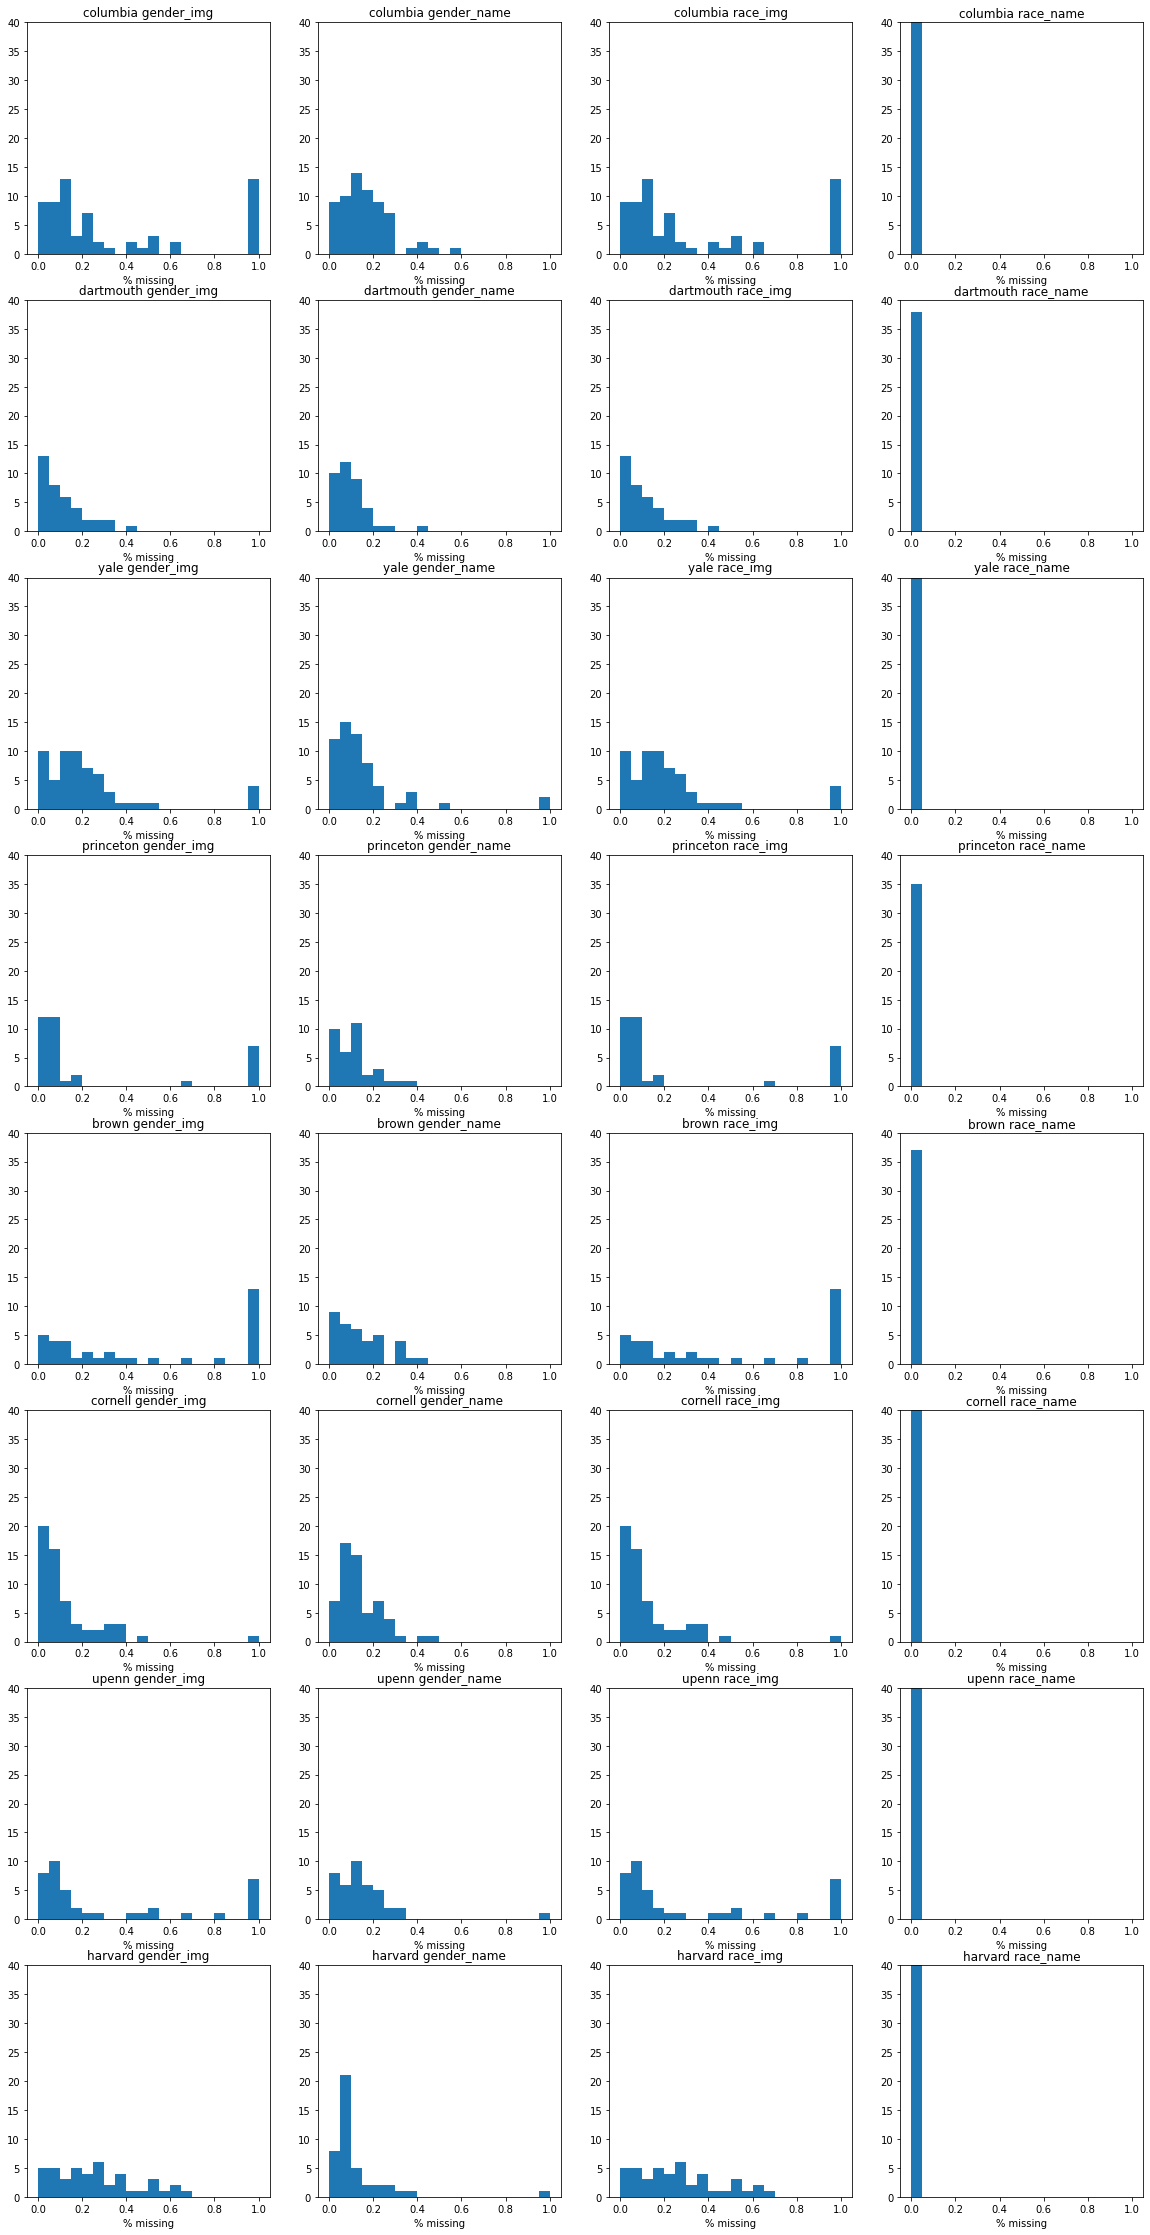

In [95]:
fig, axs = plt.subplots(8, 4, figsize=(20,40))
curr_ind = 0
for school in schools:
    the_school_df = school_pct_dfs.get(school)
    titles = ['gender_img', 'gender_name', 'race_img', 'race_name']
    features = ['gender_unknown_pct_img', 'gender_unknown_pct_name', 'race_unknown_pct_img', 'race_unknown_pct_name']
    for i in range(4):
        values = the_school_df.loc[the_school_df['rank']=='all', features[i]]
        axs[curr_ind, i].hist(the_school_df.loc[the_school_df['rank']=='all', features[i]], bins=bins)
        axs[curr_ind, i].set_title(school+ " "+ titles[i])
        axs[curr_ind, i].set_ylim(0,40)
        axs[curr_ind, i].set_xlabel('% missing')
    curr_ind += 1

plt.show()

## Whole school pct (female and non-white)

In [47]:
female_img_pcts = []
female_name_pcts = []
non_white_img_pcts = []
non_white_name_pcts = []

for school in schools:
    the_school_df = whole_school_pct_dfs.get(school)
    female_img_pct = get_pct(the_school_df, 'all', 'female', 'img')
    female_name_pct = get_pct(the_school_df, 'all', 'female', 'name')
    female_img_pcts.append(female_img_pct)
    female_name_pcts.append(female_name_pct)
    
    non_white_img_pct = 100 - get_pct(the_school_df, 'all', 'white', 'img')
    non_white_name_pct = 100 - get_pct(the_school_df, 'all', 'white', 'name')
    non_white_img_pcts.append(non_white_img_pct)
    non_white_name_pcts.append(non_white_name_pct)

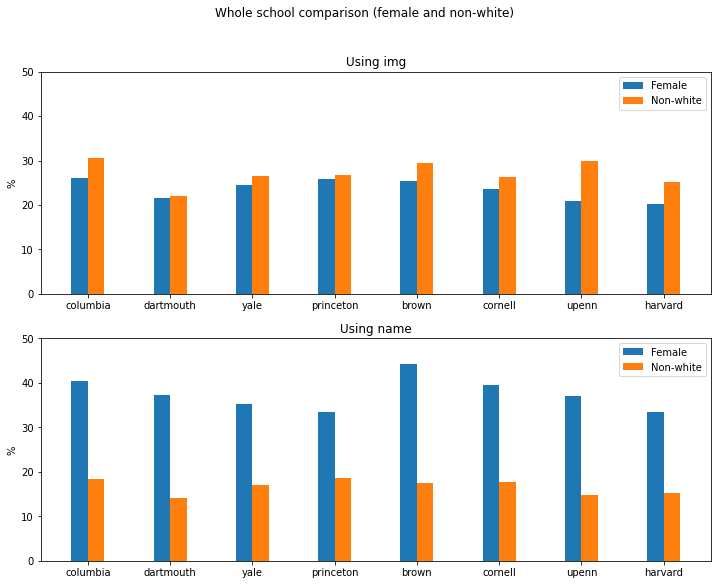

In [73]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
fig.suptitle('Whole school comparison (female and non-white)')

# Number of bars
N = 8
# Position of bars on x-axis
ind = np.arange(N)
# Width of a bar 
width = 0.2
features = ['female pct', 'non-white pct']

ax1.set_title('Using img')
ax1.bar(ind, female_img_pcts, width, label='Female')
ax1.bar(ind + width, non_white_img_pcts, width, label='Non-white')
# Plotting(name)

ax2.set_title('Using name')
ax2.bar(ind, female_name_pcts, width, label='Female')
ax2.bar(ind + width, non_white_name_pcts, width, label='Non-white')

for ax in (ax1, ax2):
    ax.set_ylim(0,50)
    ax.set_ylabel('%')
    ax.set_xticks(ind + width / 2)
    ax.legend(loc='best')
    ax.set_xticklabels(schools)

plt.show()

## Whole school comparison between ranks (img only)

In [66]:
ranks = ['professor', 'associate professor', 'assistant professor', 'teaching staff', 'other']
female_pcts = {}
non_white_pcts = {}

for school in schools:
    the_school_df = whole_school_pct_dfs.get(school)
    
    for rank in ranks:
        female_pct = get_pct(the_school_df, rank, 'female', 'img')
        non_white_pct = 100 - get_pct(the_school_df, rank, 'white', 'img')
        
        if school not in female_pcts.keys():
            female_pcts.update({school:[female_pct]})
            non_white_pcts.update({school:[non_white_pct]})
        else:
            female_pcts.get(school).append(female_pct)
            non_white_pcts.get(school).append(non_white_pct)

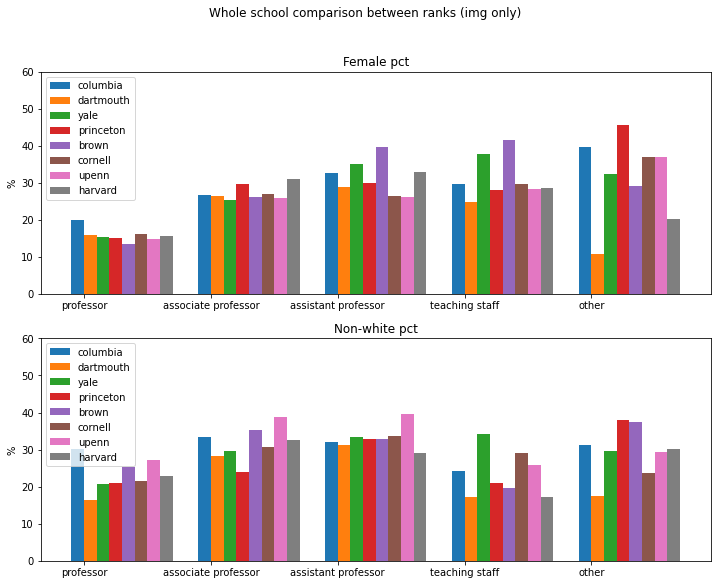

In [78]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
fig.suptitle('Whole school comparison between ranks (img only)')

# Number of bars
N = 5
# Position of bars on x-axis
ind = np.arange(N)
# Width of a bar 
width = 0.1

# the values of each school (img)
ranks = ['professor', 'associate professor', 'assistant professor', 'teaching staff', 'other']

# female pct
ax1.set_title('Female pct')
curr_ind = ind
for school in schools:
    values = female_pcts.get(school)
    ax1.bar(curr_ind, values, width, label=school)
    curr_ind = curr_ind + width

# non-white pct
ax2.set_title('Non-white pct')
curr_ind = ind
for school in schools:
    values = non_white_pcts.get(school)
    ax2.bar(curr_ind, values, width, label=school)
    curr_ind = curr_ind + width

for ax in (ax1, ax2):
    ax.set_ylim(0,60)
    ax.set_ylabel('%')
    ax.set_xticks(ind + width / 2)
    ax.legend(loc='best')
    ax.set_xticklabels(ranks)

plt.show()